Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Loading the Dataset

In [22]:
data = pd.read_csv('train.csv')
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Selecting Relevant Features

In [23]:
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = data['SalePrice']
print(features.head())

   GrLivArea  BedroomAbvGr  FullBath
0       1710             3         2
1       1262             3         2
2       1786             3         2
3       1717             3         1
4       2198             4         2


Handling Missing Values

In [24]:
features = features.fillna(features.median())
target = target.fillna(target.median())

Splitting the Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=44)
print(X_train.shape, X_test.shape)

(1168, 3) (292, 3)


Training the Linear Regression Model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


Making Predictions

In [27]:
y_pred = model.predict(X_test)
print(y_pred[:5])

[127998.78629689 140353.48606915 286956.86957666 108857.94580664
 170496.26724732]


Evaluating the Model

In [28]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2220428353.835587


Predicting for New Input

In [30]:
new_data = np.array([[2000, 3, 1]])
predicted_price = model.predict(new_data)
print(f"Predicted Price: {predicted_price[0]}")

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Price: 210363.19068840635


Visualizing Actual vs. Predicted Prices

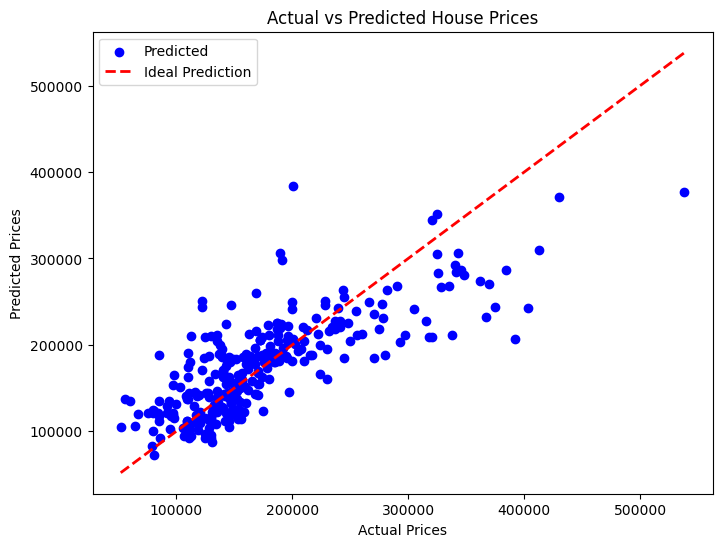

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()